#### Install neccesary libaries

In [360]:
#pip install pandas matplotlib scikit-learn

In [361]:
# Reload modules to reflect recent changes

import importlib
import util
importlib.reload(util.classes)
importlib.reload(util.types) 
importlib.reload(util.evaluator)

<module 'util.evaluator' from 'c:\\Users\\DELL\\Documents\\Project\\Research\\Code\\compression-algorithm-eval\\notebooks\\..\\util\\evaluator.py'>

#### Import the necessary libraries

In [362]:
#set the parent folder
import sys
sys.path.append('..')

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from util.classes import SimpleFrequencyTable, UniformQuantizerByRange, ANSEncoder, ANSDecoder
from util.evaluator import Evaluator

#### Load the Dataset

In [364]:
AriviyalN_Data_Wind_Direction_df = pd.read_csv(r"..\datasets\AriviyalN_Data_Wind_Direction.csv",header=0)
AriviyalN_Data_Wind_Direction = AriviyalN_Data_Wind_Direction_df['Wind Direction']
AriviyalN_Data_Wind_Direction.head(10)

0    81.0
1    71.0
2    68.0
3    64.0
4    79.0
5    61.0
6    72.0
7    61.0
8    67.0
9    68.0
Name: Wind Direction, dtype: float64

#### Inspect datasets

In [365]:
print(AriviyalN_Data_Wind_Direction.isnull().sum())

0


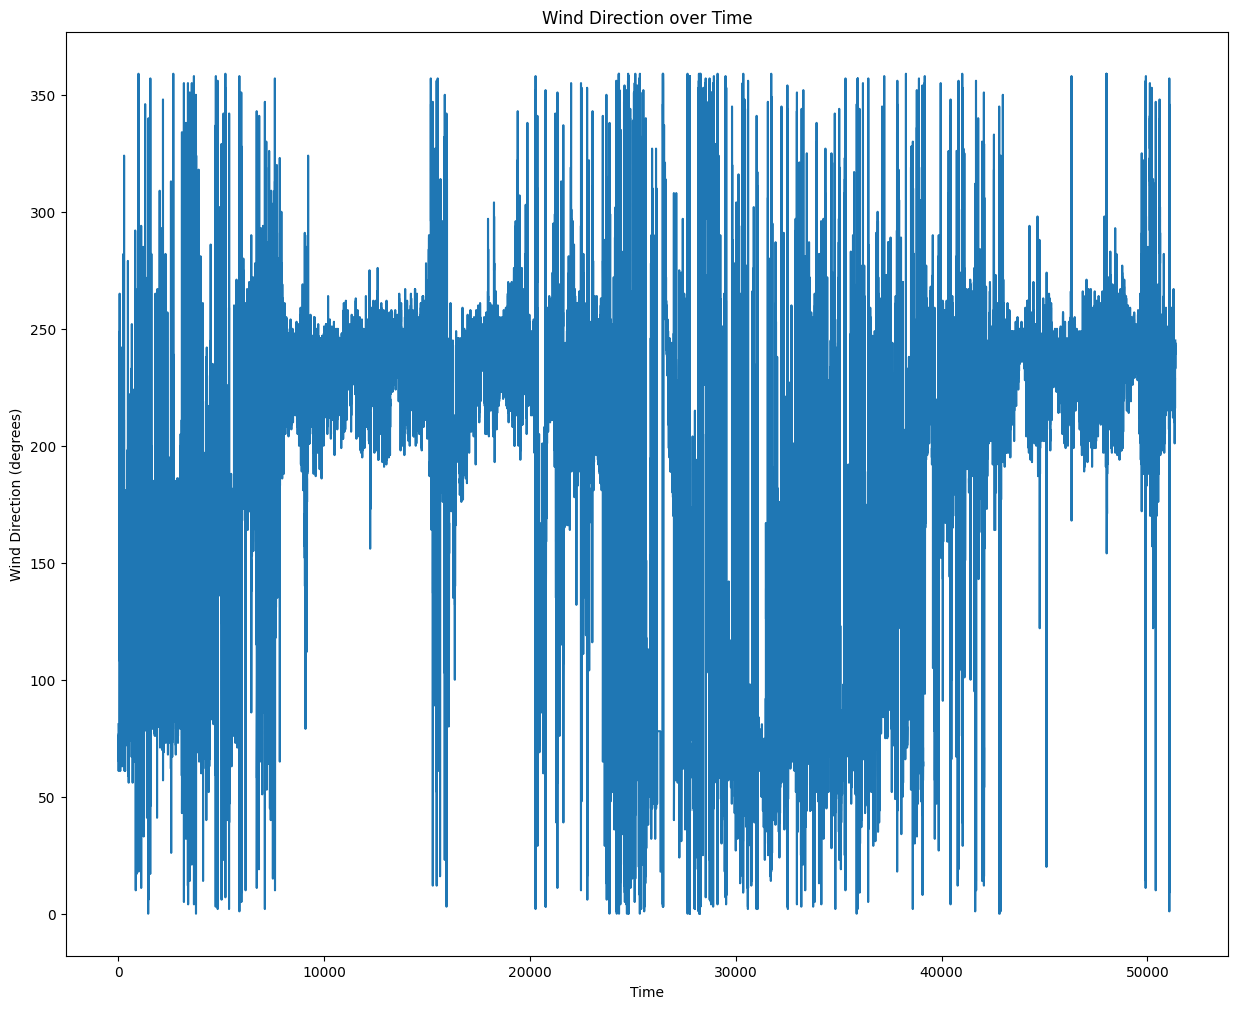

In [366]:
plt.figure(figsize=(15, 12))
plt.plot(AriviyalN_Data_Wind_Direction)
plt.title('Wind Direction over Time')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.show()

#### Plot the graph for the bins

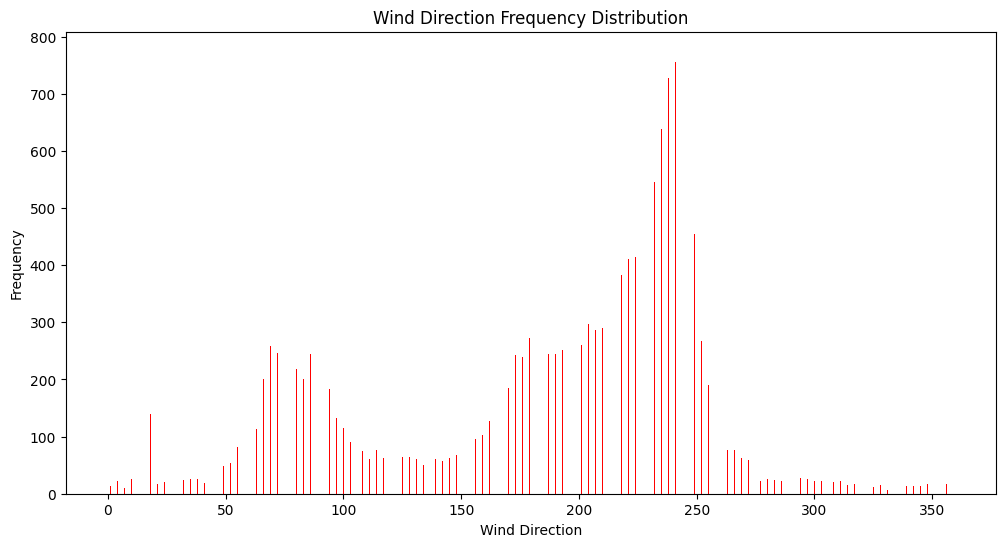

In [367]:
Wind_Direction_Bin_Size = 0.1
Wind_Direction_min,Wind_Direction_max = AriviyalN_Data_Wind_Direction.min(), AriviyalN_Data_Wind_Direction.max()
Wind_Direction_Bins = np.arange(Wind_Direction_min,Wind_Direction_max+Wind_Direction_Bin_Size,Wind_Direction_Bin_Size)

plt.figure(figsize=(12,6))
plt.hist(AriviyalN_Data_Wind_Direction, bins=Wind_Direction_Bins, color='r')
plt.title('Wind Direction Frequency Distribution')
plt.ylabel('Frequency')
plt.xlabel('Wind Direction')
plt.show()

#### Split the dataset

In [368]:
train_AriviyalN_Data_Wind_Direction , test_AriviyalN_Data_Wind_Direction = train_test_split(AriviyalN_Data_Wind_Direction,test_size=0.2,random_state=42)
print(len(train_AriviyalN_Data_Wind_Direction))
print(len(test_AriviyalN_Data_Wind_Direction))

41083
10271


### Quantize the data

In [369]:
quantizer = UniformQuantizerByRange(np.min(train_AriviyalN_Data_Wind_Direction), np.max(train_AriviyalN_Data_Wind_Direction), len(Wind_Direction_Bins))
Wind_Direction_Value_to_Symbol = [quantizer.value_to_symbol(i) for i in train_AriviyalN_Data_Wind_Direction]

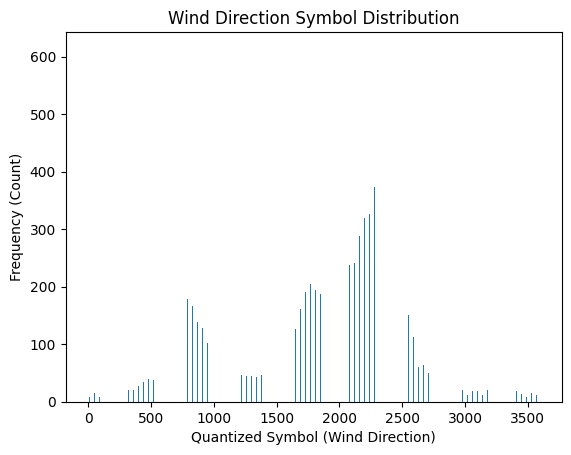

In [370]:
plt.hist(Wind_Direction_Value_to_Symbol, bins=len(Wind_Direction_Bins))
plt.title('Wind Direction Symbol Distribution')
plt.xlabel('Quantized Symbol (Wind Direction)')
plt.ylabel('Frequency (Count)')
plt.show()

#### Create a Frequency table

In [371]:
freq_table = SimpleFrequencyTable(Wind_Direction_Value_to_Symbol)

In [372]:
print(Wind_Direction_Value_to_Symbol)

[1560, 1880, 2420, 1570, 1830, 1950, 660, 420, 1700, 930, 1770, 690, 780, 2290, 830, 800, 2180, 940, 1980, 2400, 930, 940, 1070, 2370, 110, 1850, 390, 2370, 750, 3260, 2400, 1240, 2650, 2520, 1440, 2070, 1410, 3330, 2190, 2520, 2210, 2180, 860, 2350, 660, 2100, 1640, 2220, 1950, 2290, 1540, 740, 1710, 2120, 2590, 2470, 1910, 1750, 2470, 1230, 2170, 780, 2350, 1800, 2230, 2080, 690, 2400, 2330, 2040, 1960, 2200, 2720, 2430, 1930, 1400, 1100, 1880, 2650, 2430, 2390, 2120, 2630, 2140, 2240, 2290, 1770, 1360, 1820, 3060, 730, 1780, 1570, 720, 980, 1680, 2070, 1780, 2130, 2340, 2470, 1010, 1790, 1980, 1720, 2180, 2440, 1860, 2330, 2570, 2560, 2460, 1550, 2660, 1010, 1830, 2500, 780, 2400, 1680, 2160, 3130, 1130, 2170, 2140, 1850, 1520, 2130, 2290, 2330, 2330, 2370, 820, 2310, 1390, 3270, 840, 2420, 680, 2380, 3490, 2380, 1910, 2860, 2600, 2330, 2470, 2370, 1020, 2470, 1430, 2220, 2280, 780, 860, 2240, 710, 2300, 860, 2280, 2310, 2090, 2440, 2260, 2500, 2380, 800, 2500, 2060, 2340, 1880, 221

#### Encode the data

In [373]:
ansEncoder = ANSEncoder(freq_table)
bitstream=ansEncoder.encode(Wind_Direction_Value_to_Symbol)

#### Decode the data

In [374]:
ansDecoder = ANSDecoder(freq_table)
data_list = ansDecoder.decode(bitstream)

#### Compare the original data and decode the data

In [375]:
# conver the symbols back to the original values
decode_data_values = [quantizer.symbol_to_value(i) for i in data_list]

In [376]:
print("Original Data Length:", len(train_AriviyalN_Data_Wind_Direction.to_numpy().tolist()))
print("Encoded Bitstream Length:", len(bitstream))
print("Decoded Data Length:", len(decode_data_values))
print("Is original data same as decoded data?:", np.array_equal(train_AriviyalN_Data_Wind_Direction.to_numpy().tolist(), decode_data_values))
print(train_AriviyalN_Data_Wind_Direction.to_numpy().tolist())
print(decode_data_values)

Original Data Length: 41083
Encoded Bitstream Length: 80242
Decoded Data Length: 41083
Is original data same as decoded data?: True
[156.0, 188.0, 242.0, 157.0, 183.0, 195.0, 66.0, 42.0, 170.0, 93.0, 177.0, 69.0, 78.0, 229.0, 83.0, 80.0, 218.0, 94.0, 198.0, 240.0, 93.0, 94.0, 107.0, 237.0, 11.0, 185.0, 39.0, 237.0, 75.0, 326.0, 240.0, 124.0, 265.0, 252.0, 144.0, 207.0, 141.0, 333.0, 219.0, 252.0, 221.0, 218.0, 86.0, 235.0, 66.0, 210.0, 164.0, 222.0, 195.0, 229.0, 154.0, 74.0, 171.0, 212.0, 259.0, 247.0, 191.0, 175.0, 247.0, 123.0, 217.0, 78.0, 235.0, 180.0, 223.0, 208.0, 69.0, 240.0, 233.0, 204.0, 196.0, 220.0, 272.0, 243.0, 193.0, 140.0, 110.0, 188.0, 265.0, 243.0, 239.0, 212.0, 263.0, 214.0, 224.0, 229.0, 177.0, 136.0, 182.0, 306.0, 73.0, 178.0, 157.0, 72.0, 98.0, 168.0, 207.0, 178.0, 213.0, 234.0, 247.0, 101.0, 179.0, 198.0, 172.0, 218.0, 244.0, 186.0, 233.0, 257.0, 256.0, 246.0, 155.0, 266.0, 101.0, 183.0, 250.0, 78.0, 240.0, 168.0, 216.0, 313.0, 113.0, 217.0, 214.0, 185.0, 152.0, 

#### Evaluate the time 

In [377]:
evaluator = Evaluator(ansEncoder,ansDecoder)

# evaluate with test dataset
print("\nEvaluation Metrics:")
evaluator.evaluate(test_AriviyalN_Data_Wind_Direction.to_numpy().tolist())


Evaluation Metrics:


{'encode_time_sec': 1.6256692000006296,
 'encode_mem_mb': 290.0703125,
 'decode_time_sec': 1.5503438999994614,
 'decode_mem_mb': 290.07421875,
 'compression_ratio': 4.161458597113193,
 'bits_per_symbol': 15.379223055203973,
 'mse': np.float64(0.0),
 'snr_db': inf}